<a href="https://colab.research.google.com/github/beamacs/Learning-Python/blob/main/NumPy_Treehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to NumPy**
Learning NumPy from [Treehouse](https://teamtreehouse.com/library/introduction-to-numpy/introducing-arrays)

* An array's size is **immutable**. You can't `.append()`, `.insert()` or `.remove()` elements like you can with a list.
* All of an array's elements must be the same data type
* A NumPy array behaves in a Pythonic fashion. Methods such as `len(arr)` will work.
    * **Note:** Some methods may require a different syntax. Like with `.upper()`, for a NumPy array, the method would look like this: `np.char.upper(arr)` <a href="https://www.w3resource.com/numpy/string-operations/upper.php#:~:text=upper()%20function%20converts%20a%20numpy%20array%20of%20strings%20to%20uppercase.&text=The%20above%20code%20demonstrates%20the,array%20of%20strings%20to%20uppercase.">(Reference) </a>
    * Links to other documentations on NumPy
        1. [String operations documentation on NumPy](https://numpy.org/doc/stable/reference/routines.char.html#module-numpy.char "NumPy Strong Operations")
        2. [NumPy Documentation](https://numpy.org/doc/stable/user/whatisnumpy.html "Official NumPy Documentation")



In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.__version__

'1.23.5'

In [2]:
gpasList = [4.0,3.286,3.5]

# Can have elements appended to it
gpasList.append(4.0);
# Can have multiple datatypes iin it
gpasList.insert(1, "Whatevs");
# Can have items removed
gpasList.pop(1);

In [3]:
gpasList

[4.0, 3.286, 3.5, 4.0]

In [4]:
# Assign list as an array
gpas = np.array(gpasList)

# Returns documentation about numpy data types
?gpas

In [5]:
# Finding out information about a numpy array
print(gpas.dtype); print(gpas.itemsize); print(gpas.size); len(gpas); print(gpas.nbytes);

float64
8
4
32


In [6]:
# String Operation for NumPy, difference in inputting methods
txtList = ["cow","cat","cockroach","crow"]
txtArr = np.array(txtList)

print(np.char.upper(txtArr))

['COW' 'CAT' 'COCKROACH' 'CROW']


## **[Creating the Study Log](https://teamtreehouse.com/library/introduction-to-numpy/creating-the-study-log) Treehouse Section**

**Introduced:**
* `%whos` - Returns all variables in alphabetical order with their data type and info; only works in IPython notebooks.
* `np.zeros(numOfZeros, assignDataType)` - helper method that generates 0.
    * The default scalar data type is a `float64`.
* `:` **Slicing** - Returns a range of elements from the specified start and end index. The end index is excluded from the range.
* **Scalar Data Types.** Represents a singular value that might've come from an numpy array. `float64` is a scalar data type.

**References**
* [Old Data Types Documentation]
    * Says on the website the documentation was outdated but this is what Treehouse referenced for the data type
* [Updated Data Types]
    * Found a more current version of the documentation


[Old Data Types Documentation]: https://docs.scipy.org/doc/numpy-1.14.0/user/basics.types.html
[Updated Data Types]: https://www.w3resource.com/numpy/data-types.php

For the Treehouse tutorial, Craig wanted to make a ***study log*** for the **100 Days of Code Challenge**, hence `np.zeros(100)` for 100 days.


### **Setting the Study Log Up**
He wanted to make an array of 100 zeroes to represent each day in the challenge with the base unit being minutes.

1. **Assigned `studyMins1 = np.zeros(100)`**
    * By default, the scalar data type was `float64` and was storing **800 bytes**
    * This created an array of 100 `0.` which were also floats.
2. **Computed for the **max integers** needed to signify 1 day for every 0 represented in the array**
    *
    ```
    # 60 minutes, 24 hours a day
    60*24 = 1440
    ```
    * We just need to count up until **1440** minutes for a whole day.
3. **Referred to the [Old Data Types Documentation] for the data type range of integers**

    <img src="https://drive.google.com/uc?id=1QjECGmcr8ErBiSG9vh07yI2KcYBqqpAT" title = "Data Type Integer Range" width="250"/>

    * In the reference, we can see that the range for `float64` is described as: `Double precision float: sign bit, 11 bits exponent, 52 bits mantissa.`
    
    <details>
     <summary> 👁️👄👁️ OK, but what does that mean?????  </summary>

     **Let's break it down into parts**
        1. **Double precision.** Provides a high level of precision compared to other types. It can represent decimal numbers with a *lot* of digits after the decimal point accurately.
        2. **Sign bit.** Every number has a sign bit which indicates whether it's a (+) or (-) number.
        3. **11 bits exponent.** Describes the size of the number and where the decimal point should be placed. Allows it to handle both very large and very small numbers.
        4. **52 bits mantissa.** Holds the actual digits of the number. It's the decimal part of the number. The 52 bits provide enough space to store a significant number of digits.
            - You can express numbers into a scientific notation (***aka*** exponential forms or logarithmic forms).
            - E.g. 129,000,000 = 1.29 x 10^8 or  0.00026 = 2.6 × 10^-4
            - In the examples above, the **exponents** are (8,-4) and the **mantissas** are (0.29, 0.6) respectively.

     **Range and Precision:** It can represent a ***huge*** range of decimal numbers with high precision. Like it can't really be expressed as is because the range is so ***huge***.

     **Practical Use:** `float64` allows you to work with decimal numbers with a high level of precision and a vast range, making it suitable for a wide range of scientific and engineering applications.

        >***FULL DISCLOSURE:*** I used ChatGPT to make sense of it so take this with a kilogram of salt.
        
        > Link to ChatGPT Chat Log: [Understanding NumPy float64]

    </details>
    * In other words, `float64` might be too big of a data type to use. We just need a data type that is able to **count up** to **1440** minutes.
    * When run through `%whos`, we can see that the size of the `studyMins1` is 800 bytes. We could make that smaller!

4. **Reassign it to a data type that has a smaller range.**
    * We don't need a float, so we could convert it into an integer.
    * You can't study in (-) minutes, so any range that only contains (+) numbers is ideal.
    * We just need to count until 1440
    * With all that, we can reassign it as a `uint16` (***aka unsigned integer 16***) data type as it's range is from **0 - 65535**.
    * Assigned `studyMins2 = np.zeros(100, np.uint16)`
    * **Let's compare:**
        ```
        Variable     Type       Data/Info
        ---------------------------------
        studyMins1   ndarray    100: 100 elems, type `float64`, 800 bytes
        studyMins2   ndarray    100: 100 elems, type `uint16`, 200 bytes
        ```
        * We managed to lower the data size from 800 bytes to 200 bytes. Seems like a small difference *(heck, it's not even a KB)* but size *can* stack up.
        * What we did was ***optimization.*** By making the data type smaller, it can allow for faster processing time.

5. **You are now free to log in your coding minutes for each day. Remember that the index starts at *0* instead of 1.**

[Old Data Types Documentation]:
https://docs.scipy.org/doc/numpy-1.14.0/user/basics.types.html
[Understanding NumPy float64]: https://chat.openai.com/share/915ea000-7c9e-4246-9d0a-25596663785d



In [7]:
studyMins1 = np.zeros(100)
studyMins1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
#Returns all variables in alphabetical order with their data type and info
%whos

Variable     Type       Data/Info
---------------------------------
gpas         ndarray    4: 4 elems, type `float64`, 32 bytes
gpasList     list       n=4
np           module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt          module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
studyMins1   ndarray    100: 100 elems, type `float64`, 800 bytes
txtArr       ndarray    4: 4 elems, type `<U9`, 144 bytes
txtList      list       n=4


In [9]:
studyMins2 = np.zeros(100, np.uint16)
studyMins2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

In [10]:
# First Day: Coded for 2.5 hours for the 100 day coding challenge
# array[index] = num

studyMins2[0] = 150
firstDayMins = studyMins2[0]

print(firstDayMins)

150


### **What I realized:**
So what we did when we changed the data type, we reassigned every item in the `studyMins2` numpy array into a `uint16` scalar data type while the array itself remains as a `ndarray`.

In [11]:
# type() returns the data type of an object
# Scalar Data Type is uint16
print(type(firstDayMins))
# Scalar Data Type is float64
print(type(studyMins1[0]))
# Data Type is ndarray
print(type(studyMins2))

<class 'numpy.uint16'>
<class 'numpy.float64'>
<class 'numpy.ndarray'>


### **Scalars**

* Represents a singular value or element.
* <a href="https://numpy.org/doc/stable/reference/arrays.dtypes.html#arrays-dtypes:~:text=%27u1%27)%5D))-,dtype,NumPy%20data%20type%20descriptions%20are%20instances%20of%20the%20dtype%20class.,-Attributes"> Scalar data types </a>
* Single values pulled out of a numpy array are scalar and is wrapped in their specific data type object


In [12]:
# Second Day: Coded for an hour for the 100 day coding challenge
studyMins2[1] = 60

secondDayMins = studyMins2[1]

print(secondDayMins)

60


In [13]:
# Multiple Days: Days 3 - 7 log for the 100 day coding challenge
# Slicing(startIndex, endIndex): exclusive; does not include the endIndex, 6 in this case
# Inputs into day 3, 4, 5, 6
studyMins2[2:6] = [80, 60, 30, 90]

print(studyMins2)

[150  60  80  60  30  90   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


## **[Multidimensional Arrays](https://teamtreehouse.com/library/introduction-to-numpy/multidimensional-arrays) Treehouse Section**

**Introduced:**
* `.ndim` - checks the number of dimensions in an array.
* `.shape` - checks the number of elements in each dimension. Returns the rows first and then the columns.
* `.size` - checks the total number of elements in an array
* `len()` - checks the number of elements in just the first dimension of the ndarray
* `.itemsize` - checks the number of bytes an element in an array is using (byte size)
* `%whos ndarray` - you can specify the data type to pick out the variables with that data type. In this case, ndarrays only.

### **Multidimensional Arrays**
* Represents multiple values or elements.
* N-dimensional array or <a href="https://numpy.org/doc/stable/reference/arrays.dtypes.html#arrays-dtypes:~:text=%27u1%27)%5D))-,dtype,NumPy%20data%20type%20descriptions%20are%20instances%20of%20the%20dtype%20class.,-Attributes"> ndarray types </a>
* Arrays and vectors are used interchangeably.
* Terms:
	- **Rank.** Indicator for how many dimensions an array has.
	- **Vector.** Single dimensional arrays.
	- **Matrix.** Two dimensional arrays.

In [14]:
# Each column represents a different year

students_gpas = np.array([
    [4.0, 3.286, 3.5, 4.0],    # Student 1
    [3.2, 3.8, 4.0, 4.0],      # Student 2
    [3.96, 3.92, 4.0, 4.0]     # Student 3
], np.float16)

# Chose float16 since it's the smallest data type out of the floats

students_gpas

array([[4.   , 3.285, 3.5  , 4.   ],
       [3.2  , 3.8  , 4.   , 4.   ],
       [3.96 , 3.92 , 4.   , 4.   ]], dtype=float16)

#### **In the example above**
Refer to [Old Data Types Documentation]

Why choose `float16` for the data type?
* It's the smallest data type out of the floats (`float16 , float32, float64`)

Why not `uint16` like before?
* We want a float data type since gpas are float numbers
* `uint16` only supports integers
* If we decided to assign it with `uint16`, the `student_gpas` would turn into this:
    ```
    array([[4, 3, 3, 4],
        [3, 3, 4, 4],
        [3, 3, 4, 4]], dtype=uint16)
    ```
    * Completely drops the decimal numbers, which we don't want.


[Old Data Types Documentation]: https://docs.scipy.org/doc/numpy-1.14.0/user/basics.types.html


In [15]:
#Checks the number of dimensions
print(students_gpas.ndim)

#Checks the number of elements in each dimension
print(students_gpas.shape)

2
(3, 4)


**In the code above there are 2 dimensions:**
1. Students (3) (rows)
2. Year (4) (columns)

**Each element in this list represents the length of each *axis*:**
* The plural of axis is **axes**, btw.
* Remember x-axis and y-axis in graphing? Treat every dimension as an axis.
* So there is a **student-axis** and **year-axis** in this array
* For the shape of an array, it considers the rows first and then the columns.
    * If you take a look of the output of `students_gpas.shape`, you'll notice that it looks like coordinates: (3, 4)
    * To call for a specific element in an array, use the shape as your guide for the index. Remember, indexing a list starts at 0.
    * Use this syntax to call a specific element: `array1[indexFirstDim, indexSecondDim]`.
    * An example is showed below.

In [16]:
#Called Student 3's array of grades
print(students_gpas[2])

#Called Student 3's gpa from the last year
print(students_gpas[2,3])

[3.96 3.92 4.   4.  ]
4.0


In [17]:
# Returns total number of elements in an array
print(students_gpas.size)

# Returns the number of elements in the first dimension
# In this case, only the number of students
print(len(students_gpas))

# Shows how many bytes are being used for each item (byte size)
print(students_gpas.itemsize)

# Total data size
print(students_gpas.itemsize * students_gpas.size)

12
3
2
24


**Cross referencing using `%whos ndarray`:**
   
```
    Variable        Type       Data/Info
    ------------------------------------
    students_gpas   ndarray    3x4: 12 elems, type `float16`, 24 bytes
```

* We returned the correct values

**About checking properties:**
* `%whos` will only work on Jupyter or other IPython notebooks only.
* You can use `np.info()` as an alternative to this in a Python shell showed below.

In [18]:
%whos ndarray
print("\n")
np.info(students_gpas)

Variable        Type       Data/Info
------------------------------------
gpas            ndarray    4: 4 elems, type `float64`, 32 bytes
students_gpas   ndarray    3x4: 12 elems, type `float16`, 24 bytes
studyMins1      ndarray    100: 100 elems, type `float64`, 800 bytes
studyMins2      ndarray    100: 100 elems, type `uint16`, 200 bytes
txtArr          ndarray    4: 4 elems, type `<U9`, 144 bytes


class:  ndarray
shape:  (3, 4)
strides:  (8, 2)
itemsize:  2
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x59ef047fef30
byteorder:  little
byteswap:  False
type: float16


## **[Indexing] Treehouse Section**

**Introduced:**
* Adding more dimensions to an array
* Distinguising containers (Tuples)
* Random number generation for an array
* Appending to a numpy array


[Indexing]:https://teamtreehouse.com/library/introduction-to-numpy/indexing "Indexing with Craig Dennis"


**For this Treehouse tutorial, Craig set up this situation:**
* Craig got derailed from the 100 days of code challenge and wanted to attempt it again.
* Craig wanted to add a dimension called **"rounds"** into his pre-existing study log that we worked on earlier. `studyMins2`
* **Reason?** He wanted to give the challenge another try. This 2nd attempt will be his **Round 2**.


### **Adding Another Dimension**
Adding an array to an array
* `studyMins2` is your existing study log for the challenge. As of now, it is a vector. By adding another dimension, you're making the study log into a **matrix**.
* In the syntax below:
    ```
        studyMins2 = np.array([
            studyMins2,
            np.zeros(100, np.uint16)  # New dimension: rounds
        ])
    ```
    * `np.zeros(100, np.uint16)` is an array we created to act as the 2nd dimension. This will be our **"rounds"**.
    * The shape of `studyMins2` is now (2, 100), making it into a matrix.
    * 2 = rounds, 100 = days of coding

In [19]:
# Adding a new dimension to the array
# BE CAREFUL to run this only 1 time
# The more you run this, the more new dimensions are being added to your array

studyMins2 = np.array([
    studyMins2,
    np.zeros(100, np.uint16)  # New dimension, rounds
])

In [20]:
print(studyMins2.shape,"\n")
print(studyMins2)

(2, 100) 

[[150  60  80  60  30  90   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]


**Before adding a new dimension to `studyMins2` array:**
<details>
    <summary> Before </summary>

        
            [150  60  80  60  30  90   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0]
        

</details>


**After adding a new dimension to `studyMins2` array:**
<details>
    <summary> After </summary>
    
        
        [[150  60  80  60  30  90   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0]
        [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
            0   0   0   0   0   0   0   0   0   0]]
        

</details>


In [21]:
# Set round 2 day 1 to 60 mins
studyMins2[1,0] = 60

# The index in this [1,0] is assigned as a tuple by default

# When expressed as a tuple, it will look like this
studyMins2[(1,0)] = 60
print(studyMins2)

[[150  60  80  60  30  90   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [ 60   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]


### **Concepts Mentioned in Treehouse**
* **Tuple**
    * A type of iterable container. There are 3 types of iterable containers:
        1. **Lists**. Represented by `[]`
        2. **Tuples**. Represented by `()`
        3. **Dictionaries**. Represented by `{}`
            * The type of container changes depending on what kind of bracket is used to contain an array.
    * Stores objects in a specific order; you can't edit the items in it.
    * More info in my [Python Keywords Evernote]. Search for the Iterable Containers in the list

* **Random Number Generator**
    * `np.random.RandomState(seed)`
        - Constructs a random number generator
        - Must be assigned to a variable.
        - `seed` is an ***optional parameter***. A specific seed will always return the same set of random numbers.
        <details>
            <summary> Seed in practice: If you play Minecraft... </summary>
            
            >You can copy the same world generation if you find out the specific seed.

        </details>

    * `.randint(startNum,endNum,size=,dtype=)`
        - Returns an integer number selected element from the specified range. Range is inclusive of start & end number.
        <details>
            <summary> Parameters: </summary>

         - **`startNum`**. Required, the start of the integer range
         - **`endNum`**. Required, the end of the integer range
         - **`size=`**. Optional, dictates the no. of random numbers generated. Defaults to producing only 1 integer.
         - **`dtype`**. Optional, assigns the data type. Default data type is `int64`

        </details>
* **Appending an array into another array**
    * This is just adding another array to the matrix rather than adding an array to make another dimension.
    * `np.append(array, values, axis=)`
        - appends values along the mentioned axis at the end of the array
        <details>
            <summary> Parameters: </summary>

         - **`array`**. Required, array to be appended.
         - **`values`**. Required, values to be added in the array.
            - Values must have the same **shape** as the array, excluding axis.
            - If axis is not specified, values can be any shape and will be flattened before use
         - **`axis`**. Optional, axis along which we want to insert the values. By default, array is flattened.   

        </details>


[Python Keywords Evernote]:https://www.evernote.com/shard/s398/sh/2a25581f-57c0-8e72-f95b-21acd3355d47/TraldsRiaZh4uUyRNeQD3XxTSVzxVdyb75bY3pbiyd9mRNYGWeZbZPzFxg "Python Keywords"

In [22]:
# Random number generator assigned to rand
# Generating a vector called fake_log

rand = np.random.RandomState(42)
fake_log = rand.randint(30,180, size=100, dtype=np.uint16)
fake_log

array([132, 122, 128,  44, 136, 129, 101,  95,  50, 132, 151,  64, 104,
       175, 117, 146, 139, 129, 133, 176,  98, 160, 179,  99,  82, 142,
        31, 106, 117,  56,  98,  67, 121, 159,  81, 170,  31,  50,  49,
        87, 179,  51, 116, 177, 118,  78, 171, 117,  88, 123, 102,  44,
        79,  31, 108,  80,  59, 137,  84,  93, 155, 160,  67,  80, 166,
       164,  70,  50, 102, 113,  47, 131, 161, 118,  82,  89,  81,  43,
        81,  38, 119,  52,  82,  31, 159,  57, 113,  71, 121, 140,  91,
        70,  37, 106,  64, 127, 110,  58,  93,  79], dtype=uint16)

In [23]:
# This generates a list []
print([fake_log[3], fake_log[8]])
# This generates a tuple ()
fake_log[3], fake_log[8]

[44, 50]


(44, 50)

In [24]:
# Since it is in [], it's a list of 2 numbers to find in fake_log
fake_log[[3,8]]

# Reads the index as coordinates rather than individual numbers to locate
# This will return an error as the coordinates are out of bounds
# fake_log[3, 8]

array([44, 50], dtype=uint16)

In [25]:
# Creating a np.array (indexArr) to store lists of indexes

indexArr = np.array([
    [3, 8],
    [0, 1]
])

fake_log[indexArr]

array([[ 44,  50],
       [132, 122]], dtype=uint16)

#### **Appending `fake_log` to `studyMins2`**

Remember, `studyMins2` has a shape of `(2, 100)`, meaning there are 2 dimensions:
* 2 rounds
* 100 days

When appending, the array to append must have the **same number** of dimensions as the array you plan to append to. If not, it will return a ***ValueError***.

> `fake_log` has a shape of `(100,)`, meaning it has only 1 dimension.

To avoid the error, you can nestle `fake_log` into `[ ]` to make it a list of lists.
> When done, the shape will now be `(1, 100)`, making it 2 dimensional.

We want the axis to be 0, since we want `fake_log` to be round 3 rather than it being another dimension.
* As mentioned before the shape of `studyMins2` is `(2,100)` with 2 representing the "round-axis".
* To select the round-axis, which is the first dimension, the index will be **0**. Always remember that indexing always starts at 0!

**All together, the code should be:**

`studyMins2 = np.append(studyMins2, [fake_log], axis=0)`

When done, the shape of `studyMins2` should be `(3, 100)`.

In [26]:
# Original shape of fake_log
print(fake_log.shape)

# Nestling fake_log into [] to make it 2 dimensional
fake_log_list = np.array([fake_log])
fake_log_list.shape

(100,)


(1, 100)

In [27]:
# Appending fake_log to studyMins2

studyMins2 = np.append(studyMins2, [fake_log], axis=0)

In [28]:
# Logging 6 hours of coding on round 2, day 2
studyMins2[1,1] = 360

In [29]:
print(studyMins2.shape,"\n")

studyMins2

(3, 100) 



array([[150,  60,  80,  60,  30,  90,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 60, 360,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## **[Boolean Array Indexing] Treehouse Section**

**Introduced:**
* **Boolean array indexing**
* **Using bitwise logic operators:**
    * `&` - and
    * `|` - or
    * `^` - xor; exclusive or; compares if values are the same or not
        - if the same = false
        - if different = true
    * `~` - not
* **Why use Bitwise Operators rather than just and, or, xor & not?**
	- `and` and `or` considers the **entire object**
	- `&` and `|` refer to **bits** within each object.
	- When you use `and` or `or`, it's equivalent to asking Python to treat the object as a single Boolean entity.
    - **References:**
        - <a href="https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html#Boolean-operators:~:text=Boolean%20operators,usually%20Boolean)%20arrays."> Boolean Operators </a>
        - [How does bitwise ^ (XOR) work?](https://www.loginradius.com/blog/engineering/how-does-bitwise-xor-work/#:~:text=XOR%20is%20a%20bitwise%20operator%2C%20and%20it%20stands%20for%20%22exclusive%20or.%22%20It%20performs%20logical%20operation.%20If%20input%20bits%20are%20the%20same%2C%20then%20the%20output%20will%20be%20false(0%29%20else%20true(1%29.)
* **Updating certain values using boolean array indexing**

[Boolean Array Indexing]:https://teamtreehouse.com/library/introduction-to-numpy/boolean-array-indexing "Boolean Array Indexing"

In [30]:
# Boolean Array Indexing
# Returns True or False depending on the condition set
print(fake_log < 60,"\n")

# Indexing all values in fake_log that are < 60
fake_log[fake_log < 60]

[False False False  True False False False False  True False False False
 False False False False False False False False False False False False
 False False  True False False  True False False False False False False
  True  True  True False False  True False False False False False False
 False False False  True False  True False False  True False False False
 False False False False False False False  True False False  True False
 False False False False False  True False  True False  True False  True
 False  True False False False False False False  True False False False
 False  True False False] 



array([44, 50, 31, 56, 31, 50, 49, 51, 44, 31, 59, 50, 47, 43, 38, 52, 31,
       57, 37, 58], dtype=uint16)

In [31]:
# Alt way of getting all <60 but slower compared to boolean array indexing
# Will through fake_log until it collect all values <60
results = []
for value in fake_log:
    if value < 60:
        results.append(value)
np.array(results)

array([44, 50, 31, 56, 31, 50, 49, 51, 44, 31, 59, 50, 47, 43, 38, 52, 31,
       57, 37, 58], dtype=uint16)

In [32]:
# Indexing 2 conditions: numbers in between 0 and 60
# MUST USE & NOT and because it will cause a ValueError
# Put conditions in parentheses due to the order of operations
    # & is a stronger operator than < and >

print(studyMins2[(studyMins2 >0) & (studyMins2 < 60)],"\n");

# Formatting it
print(*studyMins2[(studyMins2 >0) & (studyMins2 < 60)],sep=", ");
print("")

studyMins2[studyMins2 < 60]

[30 44 50 31 56 31 50 49 51 44 31 59 50 47 43 38 52 31 57 37 58] 

30, 44, 50, 31, 56, 31, 50, 49, 51, 44, 31, 59, 50, 47, 43, 38, 52, 31, 57, 37, 58



array([30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 44, 50, 31, 56, 31, 50, 49, 51, 44, 31, 59,
       50, 47, 43, 38, 52, 31, 57, 37, 58], dtype=uint16)

In [33]:
# Updated all values that were less than 60 to 0
studyMins2[studyMins2 < 60] = 0

In [34]:
studyMins2

array([[150,  60,  80,  60,   0,  90,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 60, 360,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   


**Before updating values <60:**

<details>
    <summary> Before </summary>
    
    
            array([[150,  60,  80,  60,  30,  90,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0],
                [ 60, 360,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0],
                [132, 122, 128,  44, 136, 129, 101,  95,  50, 132, 151,  64, 104,
                    175, 117, 146, 139, 129, 133, 176,  98, 160, 179,  99,  82, 142,
                    31, 106, 117,  56,  98,  67, 121, 159,  81, 170,  31,  50,  49,
                    87, 179,  51, 116, 177, 118,  78, 171, 117,  88, 123, 102,  44,
                    79,  31, 108,  80,  59, 137,  84,  93, 155, 160,  67,  80, 166,
                    164,  70,  50, 102, 113,  47, 131, 161, 118,  82,  89,  81,  43,
                    81,  38, 119,  52,  82,  31, 159,  57, 113,  71, 121, 140,  91,
                    70,  37, 106,  64, 127, 110,  58,  93,  79]], dtype=uint16)

    
</details>


**After updating values <60 to zero:**

<details>
    <summary> After </summary>


            array([[150,  60,  80,  60,   0,  90,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0],
                [ 60, 360,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                    0,   0,   0,   0,   0,   0,   0,   0,   0],
                [132, 122, 128,   0, 136, 129, 101,  95,   0, 132, 151,  64, 104,
                    175, 117, 146, 139, 129, 133, 176,  98, 160, 179,  99,  82, 142,
                    0, 106, 117,   0,  98,  67, 121, 159,  81, 170,   0,   0,   0,
                    87, 179,   0, 116, 177, 118,  78, 171, 117,  88, 123, 102,   0,
                    79,   0, 108,  80,   0, 137,  84,  93, 155, 160,  67,  80, 166,
                    164,  70,   0, 102, 113,   0, 131, 161, 118,  82,  89,  81,   0,
                    81,   0, 119,   0,  82,   0, 159,   0, 113,  71, 121, 140,  91,
                    70,   0, 106,  64, 127, 110,   0,  93,  79]], dtype=uint16)


</details>

## **[Slicing]** Treehouse Section

**Introduces:**
* `:` **Slicing**
    * Returns a range of elements from the specified start and end index. The end index is excluded from the range.
    * You can select items by increments
    * You can reverse the order by making the increment number to (-)
    * **With Python Lists**
        * Returns a **copy** of the items.
    * **With ndarrays**
        * Returns a **data view** rather than a copy.
        * If you used the slice method to copy an ndarray to another variable and updated that variable, the original ndarray will also be updated.
        * You can use `,` to separate each dimension slice


* **`np.arrange(num)`** - generates a range up to but not including the number specificed
* **Check if a variable is a data view or not through:**
    1. `variable.base is None`
    2. `variable.flags['OWNDATA']`
* **Confirm if the array referenced is the basis of the data view:** `variable.base is varReference`
* **`.flags`** - a dictionary in NumPy
    * `OWNDATA` - key in the `.flags` dictionary; returns a boolean result whether the variable owns its values or not.
    * [flags documentation on NumPy]


[Slicing]: https://teamtreehouse.com/library/introduction-to-numpy/slicing "Slicing"
[flags documentation on NumPy]: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flags.html "np.ndarray.flags"

In [35]:
fruits = ["apple","banana","cherry","durian"]

print(fruits[1:3])
print(fruits[:3])
print(fruits[3:])

# By slicing, you are copying the items from an array
print(fruits[:])

['banana', 'cherry']
['apple', 'banana', 'cherry']
['durian']
['apple', 'banana', 'cherry', 'durian']


In [36]:
copied = fruits[:]
copied[3] = 'cheese'

fruits,copied

(['apple', 'banana', 'cherry', 'durian'],
 ['apple', 'banana', 'cherry', 'cheese'])

In [37]:
# Gets every item over increments of 2
print(fruits[::2])

#Gets every item in reverse
fruits[::-1]

['apple', 'cherry']


['durian', 'cherry', 'banana', 'apple']

In [38]:
# Generates an array up to but not including 20
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [39]:
practice = np.arange(42)
practice.shape = (7,6)
practice

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41]])

In [40]:
# Calling a particular number
print(practice[2,1],"\n")
# Calling rows 3-5
print(practice[2:5],"\n")
# Calling rows 3-5, showing only column 4
print(practice[2:5, 3],"\n")
# Calling rows 3-5, showing columns 4 until the last column
print(practice[2:5, 3:],"\n")
# Calling rows 3-5, and every other column starting at column 4
print(practice[2:5, 3::2])

13 

[[12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]] 

[15 21 27] 

[[15 16 17]
 [21 22 23]
 [27 28 29]] 

[[15 17]
 [21 23]
 [27 29]]


In [41]:
# Any slicing of ndarray returns a view and not a copy
not_copied = practice[:]
not_copied[0,0] = 90210
practice, not_copied

(array([[90210,     1,     2,     3,     4,     5],
        [    6,     7,     8,     9,    10,    11],
        [   12,    13,    14,    15,    16,    17],
        [   18,    19,    20,    21,    22,    23],
        [   24,    25,    26,    27,    28,    29],
        [   30,    31,    32,    33,    34,    35],
        [   36,    37,    38,    39,    40,    41]]),
 array([[90210,     1,     2,     3,     4,     5],
        [    6,     7,     8,     9,    10,    11],
        [   12,    13,    14,    15,    16,    17],
        [   18,    19,    20,    21,    22,    23],
        [   24,    25,    26,    27,    28,    29],
        [   30,    31,    32,    33,    34,    35],
        [   36,    37,    38,    39,    40,    41]]))

In [42]:
# Check to see if this is a base object or a data view
# True because it is not based on anything but itself
practice.base is None

True

In [43]:
# False since it's bsed on practice
not_copied.base is None

False

In [44]:
# True since not_copied is based on practice
not_copied.base is practice

True

In [45]:
# OWNDATA is a key within flags, which is a dictionary

practice.flags['OWNDATA'], not_copied.flags['OWNDATA']

(True, False)

In [46]:
not_copied.base

array([[90210,     1,     2,     3,     4,     5],
       [    6,     7,     8,     9,    10,    11],
       [   12,    13,    14,    15,    16,    17],
       [   18,    19,    20,    21,    22,    23],
       [   24,    25,    26,    27,    28,    29],
       [   30,    31,    32,    33,    34,    35],
       [   36,    37,    38,    39,    40,    41]])

## **[Manipulation] Treehouse Section**

**Introduced:**
* `.reshape()`
    * Creates a ***view*** that reshapes the length of each dimension.
    * It doesn't produce a copy so this saves up on space.
    * If you input a (-) number in the parameter for one of the dimensions, it will **infer** what number could work with whatever dimension length you set for the other dimension(s) in the same array.
* `.ravel()`
    * Reshaping in a way of putting all of the elements in a single dimension making it a vector again.
    * This is called flattening.
    * This is also just a view.
    * You could also achieve the same result if you did `.reshape(-1)`.
* `.flatten()`
    * Makes a **copy** of all the elements in an array and flattens it into one dimension.
* `np.lookfor(word)`
    * Type a word in it and it will search for a function in NumPy
    * Calls any function that the word in it flat in it, in its description & other possibly related functions
* `func?`
    * When you remember a specific function but don't remember what it does.
    * Returns a full description of what it does, what parameters it has, etc.
* `.T`
    * **Transposing**. Flips the order of the array; switches rows and columns
    * Only a view.
    * **E.g.** (2,3) abc 123 -> (3,2) a1 b2 3b


**Referenced**
* [Array manipulation routines]



[Manipulation]:https://teamtreehouse.com/library/introduction-to-numpy/manipulation "Manipulation"
[Array manipulation routines]:https://numpy.org/doc/stable/reference/routines.array-manipulation.html "Array Manipulation Routines"

### **Reshaping**

* For the example `practice`, its shape is `(7,6)`
* We made a view by doing this: `practice.reshape(3,14)` and assigned it to `practice_view`.
* This took `practice` and reshaped it from being **7 rows & 6 columns** to  **3 rows & 14 columns**
* **AN IMPORTANT NOTE:** When the array `practice` was made:
    * `practice = np.arange(42)`
        * 42 signifies the number of elements in the array.
        * The array is a vector
    * It was then reshaped: `practice.shape = (7,6)`
        * By shaping it this way, it's now a matrix.
        * The length of the 2 dimensions, when multiplied, must equate to the number of elements in the vector array. In this case, it must be equal to **42**.
        * **Why should it be equal?**
            * Because it's dividing up the elements into equal sized arrays. Arrays must be equal sized for it to work as a proper database.
            * If its not equal, it will return a ValueError like this:
            > `ValueError: cannot reshape array of size 42 into shape (3,13)`

            > Error due to 3 x 13 = 39;
            > Will work with `(3,14)` since 3 x 14 = 42
* One of the functions with `.reshape()`, if you input `-1` as a parameter for any dimension, it will infer the length of the dimension based on the specified length of other dimensions in it:
    * The integer doesn't matter, just as long as it is a negative number. *(**e.g.** If you set it to `-2`, `-3`, etc., it will just pump out the same result)*
    * Acts kind of like a placeholder. Will automatically generate a length that will equate it to the number of elements in an array.
    * **Example:** `practice.reshape(-1,14)`
        * `practice` has **42** elements and has 2 dimensions
        * We indicated `-1` for the first dimension (rows) & `14` for the second dimension (columns)
        * What you basically told it to do:
            1. **For `14` for the 2nd dimension:**
                * I want `14` columns
            2. **For `-1` for the 1st dimension:**
                * Figure it out so that I have 14 columns & that the elements are divided equally in whatever number of rows that have 14 columns.
        * In this case, 3 rows of 14 columns will satisfy your request.
        * **END RESULT:** `practice.reshape(-1,14)` shape will become `(3,14)`


In [47]:
# Made a view of a reshaped practice array called practice_view
# From a base shape of (7,6), we made a view of (3,14)

practice_view = practice.reshape(3,14)
practice, practice_view, practice_view.base is practice

(array([[90210,     1,     2,     3,     4,     5],
        [    6,     7,     8,     9,    10,    11],
        [   12,    13,    14,    15,    16,    17],
        [   18,    19,    20,    21,    22,    23],
        [   24,    25,    26,    27,    28,    29],
        [   30,    31,    32,    33,    34,    35],
        [   36,    37,    38,    39,    40,    41]]),
 array([[90210,     1,     2,     3,     4,     5,     6,     7,     8,
             9,    10,    11,    12,    13],
        [   14,    15,    16,    17,    18,    19,    20,    21,    22,
            23,    24,    25,    26,    27],
        [   28,    29,    30,    31,    32,    33,    34,    35,    36,
            37,    38,    39,    40,    41]]),
 True)

In [48]:
practice.reshape(-1,14).shape

(3, 14)

In [49]:
# Reshaping in a way of putting all of the elements in a single dimension

print(practice.ravel(),"\n")

# Can achieve the same thing with using .reshape(-1)

practice.reshape(-1)

[90210     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41] 



array([90210,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41])

In [50]:
# Returns a copy of elements into one dimension (flattened)
practice.flatten()

array([90210,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41])

In [ ]:
# To search for a function in NumPy
# Calls on any function that has flat in it or in its description & more
np.lookfor("flat")

In [52]:
# When you remember a specific function but don't remember what it does
np.ravel?

In [53]:
# Transposing. Flips the order of the array; switches rows and columns
# Only a view.
# E.g. practice shape: (7, 6) -> (6,7)
# (2,3) abc 123 -> (3,2) a1 b2 3b

practice.T

array([[90210,     6,    12,    18,    24,    30,    36],
       [    1,     7,    13,    19,    25,    31,    37],
       [    2,     8,    14,    20,    26,    32,    38],
       [    3,     9,    15,    21,    27,    33,    39],
       [    4,    10,    16,    22,    28,    34,    40],
       [    5,    11,    17,    23,    29,    35,    41]])

## **Array Programming**
[New Way of Thinking] Treehouse Section

The **Array Programming** paradigm focuses on performing vectorized operations all at once instead of using traditional loops.


**Introduced:**
* Linear Algebra functions
    * `np.linalg.solve(arr1,arr2)`
        * `np.linalg` is the module within NumPy, `.solve()` is a method.


**Reference:**
* [Array Programming Wiki](https://en.wikipedia.org/wiki/Array_programming)
* [Khan Academy Linear Algebra](https://www.khanacademy.org/math/linear-algebra)


[New Way of Thinking]:https://teamtreehouse.com/library/introduction-to-numpy/new-way-of-thinking "Array Programming"

**The Setup:**
* Craig had 4 orders, all with different food items and totals:
    1. 2 tacos for $3
    2. 4 tacos, 1 burrito, 1 horchata, 2 sodas for $20.50
    3. 1 burrito, 1 soda for $10
    4. 6 tacos, 1 horchata, 2 sodas for $14.25
* The different orders will be our 1st dimension while the different food items will be the 2nd dimension.
* The elements in the array signify the number a certain food item was bought in that order. If a food item was not ordered, it will be signified with a `0`.
    * `orders` has a shape of `(4,4)`
    * 4 orders, 4 food items
* An array for order totals will be created named `totals`.
* **What do we want to find out?** The price of the individual food items.

**The Result:**
* Taco - $1.50

* Burrito - $8

* Horchata - $1.25

* Soda - $2

In [54]:
# Setting up the order matrix and total array
orders = np.array([
    [2, 0, 0, 0],   # Order 1
    [4, 1, 2, 2],   # Order 2
    [0, 1, 0, 1],   # Order 3
    [6, 0, 1, 2]    # Order 4
])

totals = np.array([3, 20.50, 10, 14.25])

# Solves it through the np.linalg module (linear algebra)
# Result is the price per food item
prices = np.linalg.solve(orders, totals)
prices

array([1.5 , 8.  , 1.25, 2.  ])

In [55]:
# Validating if it produced the right prices
# Multiplying a matrix with a vector array and summing them togather
# Inner Product: A • B
orders @ prices

array([ 3.  , 20.5 , 10.  , 14.25])

In [56]:
# Another notation for inner product
orders.dot(prices)

array([ 3.  , 20.5 , 10.  , 14.25])

#### **Teacher's Notes on Treehouse**
**Linear Algebra**
* There is a module for linear algebra, [linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
* You can solve for a system of equations using the [solve function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve)
    * You can create a square 2 dimensional matrix and a constant row vector and solve for each variable column
    * You can double check the answer using the inner product or [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot).
* You can use the `@` to produce the dot product of two arrays.

## **[Universal Functions] Treehouse Section**
Universal functions are vectorized functions that can work on all values in an array at once; ***AKA ufuncs***

**Introduced:**
* ufuncs

**References:**
* [Ufunc Documentation](https://numpy.org/doc/stable/reference/ufuncs.html)
* [Automatic Vectorization](https://en.wikipedia.org/wiki/Automatic_vectorization)
* [Write your own Ufunc](https://numpy.org/doc/stable/user/c-info.ufunc-tutorial.html)

[Universal Functions]:https://teamtreehouse.com/library/introduction-to-numpy/universal-functions "Universal Functions"

In [57]:
a, b = np.split(np.arange(1,11),2)
a, b

(array([1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10]))

In [58]:
a + b

array([ 7,  9, 11, 13, 15])

In [59]:
# .repeat makes an array of five 2s
a + np.repeat(2,5)

array([3, 4, 5, 6, 7])

In [60]:
# This is the same as np.repeat(2,5)
# 2 is spread out to become an array of five 2s
    # This is called broadcasting
# 2 is a scalar data type. It automatically broadcasts it
    # to the length of an array
a + 2

array([3, 4, 5, 6, 7])

In [61]:
# np.add()
# Brodcasting

x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)
x1, x2

(array([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]),
 array([0., 1., 2.]))

In [62]:
# The left array will be the base while the right
    # will be broadcasted upon the left array

np.add(x1, x2)

array([[ 0.,  2.,  4.],
       [ 3.,  5.,  7.],
       [ 6.,  8., 10.]])

In [63]:
# The scalar number 2 is broadcasted over x1 and is multiplied
np.multiply(x1,2)

array([[ 0.,  2.,  4.],
       [ 6.,  8., 10.],
       [12., 14., 16.]])

In [64]:
# The scalar number 2 is broadcasted over x1 and the hypotenuse
    # is solved for
# Just showing the possible math equations you could do by just
    # changing the function

np.hypot(x1,2)

array([[2.        , 2.23606798, 2.82842712],
       [3.60555128, 4.47213595, 5.38516481],
       [6.32455532, 7.28010989, 8.24621125]])

In [65]:
# There are also coomparison functions
np.greater_equal(x1,2)

array([[False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

#### **Teacher's Notes on Treehouse**
**Universal Functions**
* [ufuncs](https://docs.scipy.org/doc/numpy/reference/ufuncs.html) are commonly needed vectorized functions
  * Vectorized functions allow you to operate element by element without using a loop
* The standard math and comparison operations have all been overloaded so that they can make use of vectorization
* Values can be [broadcasted](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html), or stretched to be applied to the ufuncs.

## **[Routines in Action] Treehouse Section**

**Introduced**
* `np.ufunc.reduce(arr)` - Reduces array's dimension by one, by applying ufunc along one axis.
* `np.ufunc.accumulate(arr)` - Accumulate the result of applying the operator to all elements.

**References:**
* [Ufunc Methods](https://numpy.org/doc/stable/reference/ufuncs.html#methods)
* [Statistics Ufuncs](https://numpy.org/doc/stable/reference/routines.statistics.html)
* [NumPy Routines](https://numpy.org/doc/stable/reference/routines.html)
    * Organized list of topics and contains functions related to said topic
    * Topics include: Financial functions, polynomials, statistics, etc.


[Routines in Action]:https://teamtreehouse.com/library/introduction-to-numpy/routines-in-action "Routines in Action"

In [66]:
students_gpas

array([[4.   , 3.285, 3.5  , 4.   ],
       [3.2  , 3.8  , 4.   , 4.   ],
       [3.96 , 3.92 , 4.   , 4.   ]], dtype=float16)

In [67]:
# Returned the mean of all grades in the array
students_gpas.mean()

3.805

In [68]:
# Mean gpa of each student through all years
# Called on the 2nd dimension/axis; index = 1
students_gpas.mean(axis=1)

array([3.695, 3.75 , 3.97 ], dtype=float16)

In [69]:
# Mean gpa of each year through all students
# Called on the 1st axis; index = 0
students_gpas.mean(axis=0)

array([3.72 , 3.668, 3.834, 4.   ], dtype=float16)

**Remember:** The function happens across the axis.

The examples above are examples of a reduction operation.

**Reduction Operation**
* The function reduces a set of values down to one.
* A function that takes 2 values: a total value of all operation & the next value in the array-like object
* Basically goes through a list sequentially. Kinda like this:
    * **Example:** `[1,2,3,4,5,6]`
    * 1+2 = 3; saves `3`
    * `3`+3 = 6; saves `6`
    * `6`+4 = 10; saves `10`
    * so on until it adds everything in the array, the result being `21`.

In [70]:
studyMins2[0]

array([150,  60,  80,  60,   0,  90,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint16)

In [71]:
# Adding all the minutes in round 1
np.add.reduce(studyMins2[0])

440

In [72]:
np.add.accumulate(studyMins2[0])

array([150, 210, 290, 350, 350, 440, 440, 440, 440, 440, 440, 440, 440,
       440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440,
       440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440,
       440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440,
       440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440,
       440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440,
       440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 440,
       440, 440, 440, 440, 440, 440, 440, 440, 440], dtype=uint64)

In [73]:
# Adding all the minutes in round 1
np.sum(studyMins2[0])

440

In [74]:
# Adding all the minutes in all 3 rounds
np.sum(studyMins2)

10150

In [75]:
# Adding all the minutes in all 3 rounds respectively
np.sum(studyMins2, axis=1)

array([ 440,  420, 9290], dtype=uint64)

In [76]:
# Standard Deviation of all minutes in all 3 rounds respectively
np.std(studyMins2, axis=1)

array([20.55821004, 36.25410322, 54.84459864])

#### **Teacher's Notes on Treehouse**
* Common [mathematical](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.math.html) [routines](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.html) are exposed so the formula can be abstracted away.
    * [`mean`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html#numpy.mean) is a [statistics](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.statistics.html) routine used to calculate the average.
* Reduction functions take a dimension and collapse it into a single value.
    * These functions define an axis parameter, and you should remember that the function works across the dimension.

## **[Plotting] Treehouse Section**

**Introduced:**
* Matplotlib - `matplotlib.pyplot as plt`
    * Library for creating static, animated, and interactive visualizations in Python.

**References:**
* [Introduction to Data Visualization With Matplotlib](https://teamtreehouse.com/library/introduction-to-data-visualization-with-matplotlib "Treehouse Course")
* [Matplotlib Cheetsheets](https://matplotlib.org/cheatsheets/)
* [Craig's Intro to NumPy Jupyter NB](https://teamtreehouse.com/library/introduction-to-numpy/no-problem)
    * Craig's (the instructor) Jupyter NB that he has been working on throughout the Treehouse course.





[Plotting]: https://teamtreehouse.com/library/introduction-to-numpy/plotting

[]

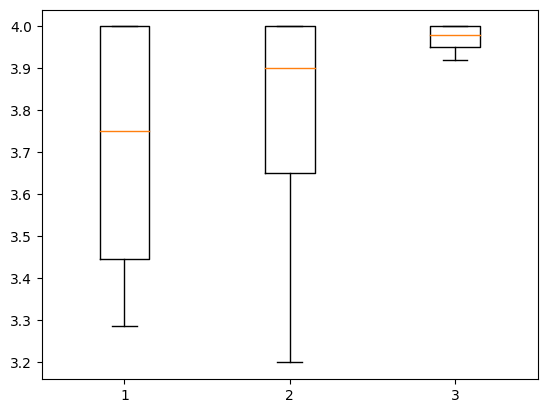

In [79]:
# Box plot for the gpas of the 3 students along their 4 years of study
plt.boxplot(students_gpas.T)
plt.plot()

(array([26., 25., 18., 17.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 60.,  90., 120., 150., 180., 210., 240., 270., 300., 330., 360.]),
 <BarContainer object of 10 artists>)

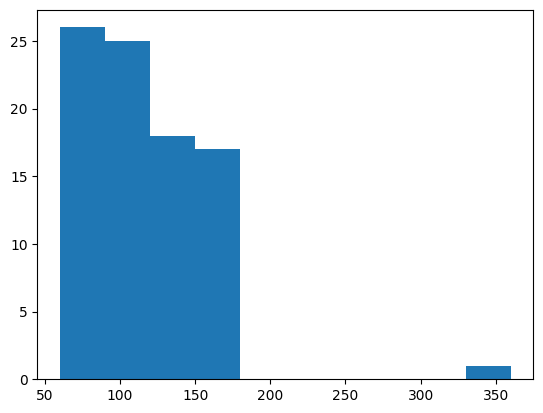

In [90]:
# Pass in a one dimensional array of all the minutes that's >0
# Broadcasts 0 to studyMins2 array so it becomes a vector array.
# No need to use .ravel()
plt.hist(studyMins2[studyMins2>0])

## **BONUS CONTENT WOOHOO**
Some notable Q&As from the Questions tab in the Intro to NumPy.

1. **[Can someone please help? Not sure why I keep getting an error!]**

```
student_gpas = np.array([[4.01, 3.286, 3.5], [3.2, 3.8, 4.0, 4.0], [3.96, 3.92, 4.0, 4.0]], np.float16) student_gpas
```

<details>
    <summary> ValueError </summary>
    
    ValueError Traceback (most recent call last) <ipython-input-76-ee784e6a4479> in <module>() ----> 1 student_gpas = np.array([[4.01, 3.286, 3.5], [3.2, 3.8, 4.0, 4.0], [3.96, 3.92, 4.0, 4.0]], np.float16) 2 student_gpas

    ValueError: setting an array element with a sequence.

</details>

<details>
    <summary> Answer </summary>

* It seems your first list `[4.01, 3.285, 3.5]` element in the np.array only has 3 items (grades) while the others both have four.
* If you add another grade to make this a 3x4 dimensional matrix it works.
* If you don't have a grade to add, you can still make this work by simply putting 'nan' in place of the missing grade(s).
* **Note**: 'nan' is recognized by Python as "not a number" and is used to fill in missing data. It may look like a string (need to use quotes for this list item), but any string or an empty string doesn't work and results in a datatype incompatibility with your float16 type.

</details>

2. **[Precision Error]**

Very minor point but Craig states at around 5:10 in this video that we didn't run into any **precision errors** with our dataset, but we actually did. 3.286 stored as np.float16 becomes 3.28515625, which was displayed in the Jupyter Notebook output as 3.285.

<details>
    <summary> Answer </summary>

**From Craig, the instructor**: Nice catch Stuart! If you pay attention, you'll notice I stumble....I was expecting it in the last row, but missed it in the first one!

That's a great example of the precision problem.

Nice 👀!
</details>

3. [My list of of an array can be appended but my slice can not. I don't understand why.]
* It is a whole thread but it's worth the read. Click the link to the question above to view it.
* Talks about the introduction of a new method of adding a new dimension using `arr[:, np.newaxis]` that was mentioned in the Teacher's Notes.
* Only included but it wasn't explained too much so I don't know how to properly use it yet.
* OP was trying to append `fake_log`. In his 2nd attempt, he tried to add a new dimension to the `fake_log` array while adding the new dimension within the parameter.

<details>
    <summary> Answer </summary>

* The issue with the second line you mention above, with `nd.newaxis`, is that it does create a 2D array, but it creates it in the opposite direction to what you need. In other words, if I isolate just `fake_log[:, np.newaxis]`, I get:

```
array([[132],
       [122],
       [128],
       [ 44],
       [136],
       [129],

       ... etc ...

       [110],
       [ 58],
       [ 93],
       [ 79]], dtype=uint16)

```
* Shape is `(100, 1)`. This is the opposite of `fake_log` in the original example, which is `(1, 100)`.

* The error you get is that the number of rows and columns don't match up like they need to. In theory, you could fix the problem by swapping the np.newaxis with the : (i.e., the rows and columns), like so:

`new_fake_log = np.append(study_minutes, fake_log[np.newaxis, :], axis=0)`

* But `[fake_log]` is easier and gives the same result, so might as well just do that.

* It flattened the array when you don't specify an axis for `np.append`. This would have happened even if the array dimensions had matched.

</details>





[Can someone please help? Not sure why I keep getting an error!]:https://teamtreehouse.com/community/can-someone-please-helpnot-sure-why-i-keep-getting-an-error
[Precision Error]:https://teamtreehouse.com/community/precision-error
[My list of of an array can be appended but my slice can not. I don't understand why.]:https://teamtreehouse.com/community/my-list-of-of-an-array-can-be-appended-but-my-slice-can-not-i-dont-understand-why